# Credit Default Prediction

Data Set Information: The training data contains 22500 observations with the predictor variables as well as the response variable. The test set contains 7500 observations with the response variable removed.

Task: Predict the response variable (default status) for the test data.

***IMPORTANT: Please include the variable "ID" in the prediction, so that model accuracy can be evaluated.***

Variable descriptions: This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.

This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:

X6 = the repayment status in September, 2005;

X7 = the repayment status in August, 2005; . . .;

X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:

-1 = pay duly;

1 = payment delay for one month;

2 = payment delay for two months; . . .;

8 = payment delay for eight months;

9 = payment delay for nine months and above.

-2 = indicates no consumption in the month, and a value of

0 = indicates the use of revolving credit (equivalent to prepayment)

X12-X17: Amount of bill statement (NT dollar).

X12 = amount of bill statement in September, 2005;

X13 = amount of bill statement in August, 2005; . . .;

X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar).

X18 = amount paid in September, 2005;

X19 = amount paid in August, 2005; . . .;

X23 = amount paid in April, 2005.

## The below Report is divided into 3 main sections namely:

### 1. Initialize Libraries, Load Data & Preprocess
### 2. Exploratory Data Analysis and Visualization
### 3. Predictive Modeling

###Goal of the study is to create a model that predicts if a client will default on credit card payment in next month.

###This is a Supervised binary classification problem. Where Defaulter Yes(1) or No(0) is the dependant variable
To find the predictability of a defaulter our main objective is to find what features can play a role to predict a credit card defaulter? Therefore we need to find answers to some questions like:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

In [2]:
loan = pd.read_csv(r'C:\Users\turan\Desktop\Kaggle/credit_card_default_TRAIN.csv', header=1)
loan1 = pd.read_csv(r'C:\Users\turan\Desktop\Kaggle/credit_card_default_TRAIN.csv')
loan.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
loan1.head().T

,0,1,2,3,4
Variable,ID,1,2,3,4
X1,LIMIT_BAL,20000,120000,90000,50000
X2,SEX,2,2,2,2
X3,EDUCATION,2,2,2,2
X4,MARRIAGE,1,2,2,1
X5,AGE,24,26,34,37
X6,PAY_0,2,-1,0,0
X7,PAY_2,2,2,0,0
X8,PAY_3,-1,0,0,0
X9,PAY_4,-1,0,0,0


#### Explotary Data Analysis

In [4]:
loan.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
loan.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
gender_values = {
    1:'male',
    2:'female'
}

loan.SEX = loan.SEX.map(gender_values)

In [7]:
loan.loc[(loan['EDUCATION']==5) | (loan['EDUCATION']==6) | (loan['EDUCATION']==0), 'EDUCATION'] = 4

In [8]:
education_values = {
    1:'graduate_shool',
    2:'university',
    3:'high_school',
    4:'others'
}

loan.EDUCATION = loan.EDUCATION.map(education_values)

In [9]:
loan.loc[loan['MARRIAGE']==0, 'MARRIAGE'] = 3

In [10]:
marital_status = {
    1:'married',
    2:'single',
    3:'others'
}

loan.MARRIAGE = loan.MARRIAGE.map(marital_status)

In [11]:
loan.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
loan.columns = loan.columns.str.lower()
loan.rename(columns={'default payment next month':'defaulted'}, inplace=True)
loan.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### 1. Is the % of defaulters significantly different between male & female ?

In [13]:
loan.sex.unique()

array(['female', 'male'], dtype=object)

In [14]:
global_mean = round(loan['defaulted'].mean(),3)
global_mean

0.226

In [15]:
def default_stat(column):
    data_group = loan.groupby(column)['defaulted'].agg(['mean'])
    data_group['diff'] = data_group['mean'] - global_mean
    data_group['risk'] = data_group['mean']/global_mean
    return data_group

In [16]:
default_stat('sex')

,mean,diff,risk
sex,,,
female,0.213344,-0.012656,0.944000
male,0.246152,0.020152,1.089169


The default rate for males is 24.6%

The default rate for females is 21.3%

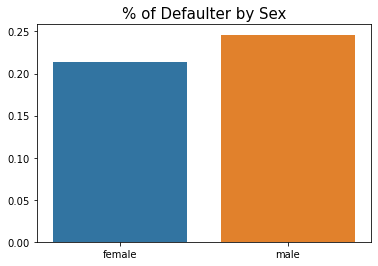

In [17]:
sex_df = default_stat('sex')
values = list(sex_df['mean'])
labels = list(sex_df.index)
plt.title(label='% of Defaulter by Sex', fontsize=15)
sns.barplot(labels,values)
plt.show()

Default of male and female costumers are not very different from each other and global default rate.

#### 2. How does Marital Status effect the proportion of defaulters ?

In [18]:
loan['marriage'].value_counts()

single     12219
married     9990
others       291
Name: marriage, dtype: int64

In [19]:
default_stat('marriage')

,mean,diff,risk
marriage,,,
married,0.242543,0.016543,1.073197
others,0.230241,0.004241,1.018763
single,0.212620,-0.013380,0.940795


The default rate for married borrowers is 24.3%

The default rate for single borrowers is 21.3%

The default rate for others is 23.0%

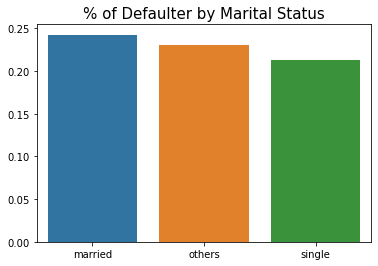

In [20]:
marriage_df = default_stat('marriage')
values = list(marriage_df['mean'])
labels = list(marriage_df.index)
plt.title(label='% of Defaulter by Marital Status', fontsize=15)
sns.barplot(labels,values)
plt.show()

#### 3. Does the Level of Education play a role in the % of defaulters ?

In [21]:
loan['education'].value_counts()

university        10634
graduate_shool     7982
high_school        3581
others              303
Name: education, dtype: int64

In [22]:
default_stat('education')

,mean,diff,risk
education,,,
graduate_shool,0.197319,-0.028681,0.873093
high_school,0.258866,0.032866,1.145426
others,0.066007,-0.159993,0.292065
university,0.241301,0.015301,1.067706


The default rate for graduate schoolers is 19.7%

The default rate for university students is 24.099999999999998%

The default rate for high schoolers is 25.900000000000002%

The default rate for others is 6.6000000000000005%

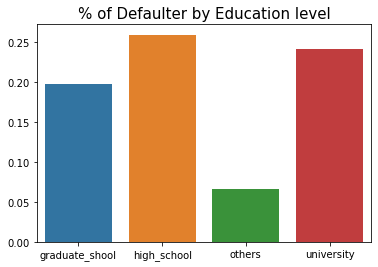

In [23]:
education_df = default_stat('education')
values = list(education_df['mean'])
labels = list(education_df.index)
plt.title(label='% of Defaulter by Education level', fontsize=15)
sns.barplot(labels,values)
plt.show()

The default of high school graduate borrowers are higher while default of graduaters of high institutions are lower.

#### 4. Which age group constitutes for higher proportion of defaulters ?

In [24]:
loan['age'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79], dtype=int64)

In [25]:
default_young = round(loan[loan['age']<30]['defaulted'].mean(),3)
print(f'The default rate for people aged younger than 30 is {default_young*100}%')

The default rate for people aged younger than 30 is 23.400000000000002%


In [26]:
default_adult = round(loan[(loan['age']>=30)&(loan['age']<50)]['defaulted'].mean(),3)
print(f'The default rate for middle aged people is {default_adult*100}%')

The default rate for middle aged people is 21.7%


In [27]:
default_old = round(loan[loan['age']>=50]['defaulted'].mean(),3)
print(f'The default rate for people older than 50 is {default_old*100}%')

The default rate for people older than 50 is 25.4%


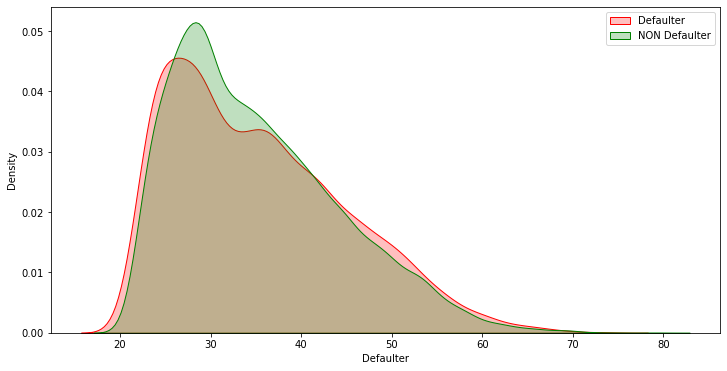

In [28]:
defaulters = loan[loan["defaulted"] == 1]
non_defaulters = loan[loan["defaulted"] == 0]
defaulters["Defaulter"] = defaulters["age"]
non_defaulters["Non Defaulter"] = non_defaulters["age"]
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(defaulters["Defaulter"], shade=True, color="r", label='Defaulter')
ax = sns.kdeplot(non_defaulters["Non Defaulter"], shade=True, color="g", label='NON Defaulter')
plt.legend()
plt.show()

The default rate for middle aged people is less than other people.

#### 5. Is the number of defaulters correlated with credit limit ?

In [29]:
loan[['limit_bal']].corrwith(loan['defaulted']).to_frame('Correlation')

,Correlation
limit_bal,-0.148079


The credit limit and default of borrowers are negatively correlated. People with lower credit balance tend to default more

#### 6. Is there a pattern in past repayment statuses which can help predict probability of a defaulter ?

In [30]:
lst = ['pay_0','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [31]:
lst2 = []

In [32]:
for i in lst:
    keys = list(loan.groupby(i).mean()[['defaulted']].index)
    values =  list(loan.groupby(i).mean()['defaulted'])
    d = dict(zip(keys, values))
    lst2.append(d)

In [33]:
rep_df = pd.DataFrame(lst2)
rep_df

,-2,-1,0,1,2,3,4,5,6,7,8
0,0.129508,0.176770,0.129190,0.343816,0.683708,0.753086,0.650794,0.529412,0.555556,0.857143,0.529412
1,0.192279,0.163310,0.162461,0.150000,0.553589,0.601594,0.492958,0.666667,0.888889,0.529412,0.000000
2,0.190792,0.161384,0.178427,0.250000,0.510424,0.567251,0.603175,0.687500,0.550000,0.814815,0.500000
3,0.196335,0.166037,0.188356,0.500000,0.523005,0.597315,0.703704,0.481481,0.400000,0.804348,0.500000
4,0.201565,0.164325,0.192492,NaN,0.537572,0.676056,0.588235,0.500000,0.666667,0.808511,1.000000
5,0.206171,0.172795,0.192859,NaN,0.496400,0.626667,0.600000,0.666667,0.750000,0.810811,1.000000


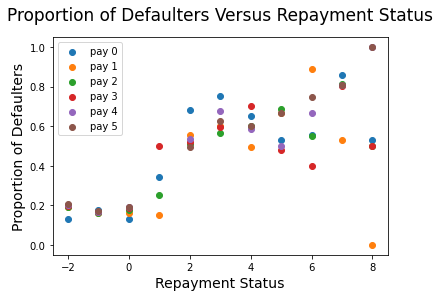

In [34]:
for i in range(6):
    x = list(rep_df.iloc[i,:])
    plt.title('Proportion of Defaulters Versus Repayment Status', fontsize=17, y = 1.05) 
    plt.ylabel('Proportion of Defaulters', fontsize=14)
    plt.xlabel('Repayment Status', fontsize=14)
    plt.scatter(rep_df.columns,x, label="pay {}".format(i))
    plt.legend()

#### 7. Does the history of credit card bill amount has a correlation with the % of defaulters ?

In [35]:
ls = ['bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']

In [36]:
loan[ls].corrwith(loan['defaulted']).to_frame('Correlations')

,Correlations
bill_amt1,-0.022562
bill_amt2,-0.016293
bill_amt3,-0.014983
bill_amt4,-0.009084
bill_amt5,-0.005547
bill_amt6,-0.004120


#### **Feature engeenering**

In [37]:
bills_amt  = loan.iloc[:,12:18]

In [38]:
pays_amt = loan.iloc[:,18:-1]

In [39]:
for i in range(6):
    name = 'bill_pay_ratio0{}'.format(i+1)
    loan[name] = (bills_amt.iloc[:,i] - pays_amt.iloc[:,i]) / loan['limit_bal']

In [40]:
loan.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt4,pay_amt5,pay_amt6,defaulted,bill_pay_ratio01,bill_pay_ratio02,bill_pay_ratio03,bill_pay_ratio04,bill_pay_ratio05,bill_pay_ratio06
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,1,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000
1,2,120000,female,university,single,26,-1,2,0,0,...,1000,0,2000,1,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508
2,3,90000,female,university,single,34,0,0,0,0,...,1000,1000,5000,0,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211
3,4,50000,female,university,married,37,0,0,0,0,...,1100,1069,1000,0,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940
4,5,50000,male,university,married,57,-1,0,-1,0,...,9000,689,679,0,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040


In [41]:
loan.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'defaulted',
       'bill_pay_ratio01', 'bill_pay_ratio02', 'bill_pay_ratio03',
       'bill_pay_ratio04', 'bill_pay_ratio05', 'bill_pay_ratio06'],
      dtype='object')

In [42]:
categorical = ['sex', 'education', 'marriage']

In [43]:
#Calculating dependency score
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, loan['defaulted'])

data_mi = loan[categorical].apply(calculate_mi)
data_mi = data_mi.sort_values(ascending=False).to_frame(name='Mi')
data_mi

,Mi
education,0.002918
sex,0.000727
marriage,0.000624


Dependency between target variable and categorical variables are for Education is strong, but it's not quite good for gender and marriage.

In [44]:
#Splitting data
from sklearn.model_selection import train_test_split

In [45]:
train_full, test_X = train_test_split(loan, test_size=0.2, random_state=1)  

In [46]:
train_X, val_X = train_test_split(train_full, test_size=0.2, random_state=1)

In [47]:
train_y = train_X['defaulted'].values.reshape(-1,1)
val_y = val_X['defaulted'].values.reshape(-1,1)
test_y = test_X['defaulted'].values.reshape(-1,1)

In [48]:
del train_X['defaulted']
del val_X['defaulted']
del test_X['defaulted']

In [49]:
#Encoding data
train_dict = train_X.to_dict(orient='rows')

In [50]:
train_dict[0]

{'id': 1856,
 'limit_bal': 220000,
 'sex': 'female',
 'education': 'university',
 'marriage': 'married',
 'age': 54,
 'pay_0': -1,
 'pay_2': -1,
 'pay_3': -1,
 'pay_4': -1,
 'pay_5': -2,
 'pay_6': -2,
 'bill_amt1': 8727,
 'bill_amt2': 2553,
 'bill_amt3': 147,
 'bill_amt4': 0,
 'bill_amt5': 0,
 'bill_amt6': 0,
 'pay_amt1': 3011,
 'pay_amt2': 147,
 'pay_amt3': 0,
 'pay_amt4': 0,
 'pay_amt5': 0,
 'pay_amt6': 0,
 'bill_pay_ratio01': 0.025981818181818182,
 'bill_pay_ratio02': 0.010936363636363636,
 'bill_pay_ratio03': 0.0006681818181818182,
 'bill_pay_ratio04': 0.0,
 'bill_pay_ratio05': 0.0,
 'bill_pay_ratio06': 0.0}

In [51]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [52]:
X_train = dv.transform(train_dict)
len(X_train[0])

36

In [53]:
val_dict = val_X.to_dict(orient='rows')

X_val = dv.transform(val_dict)

In [54]:
len(X_val[0])

36

#### Logistic Regression

In [55]:
#Creating LogisticRegression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, train_y)

LogisticRegression(random_state=1, solver='liblinear')

In [56]:
preds = model.predict_proba(X_val)[:,1]

In [57]:
y_pred = (preds>0.49).reshape(-1,1)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(val_y, y_pred)

0.7744444444444445

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
roc_auc_score(val_y, y_pred)

0.5

#### Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train, train_y)

DecisionTreeClassifier()

In [64]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(train_y, y_pred)

1.0

In [65]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.5976537376935636

overfitting

In [66]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, train_y)

DecisionTreeClassifier(max_depth=2)

In [67]:
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- pay_0 <= 1.50
|   |--- pay_2 <= 1.50
|   |   |--- class: 0
|   |--- pay_2 >  1.50
|   |   |--- class: 0
|--- pay_0 >  1.50
|   |--- pay_3 <= -0.50
|   |   |--- class: 0
|   |--- pay_3 >  -0.50
|   |   |--- class: 1



In [68]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(train_y, y_pred)

0.6985141251755892

In [69]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.6812140436494194

In [70]:
for depth in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, train_y)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(val_y, y_pred)
    print(f'{depth}-->{auc}')

1-->0.6230042900255139
2-->0.6812140436494194
3-->0.7192058593832823
4-->0.7346651023740025
5-->0.7374126269515375
6-->0.7328478489797937
10-->0.7003334134326564
15-->0.6119000060074493
20-->0.5911634838965023
None-->0.597031790007845


In [71]:
for m in [4,5,6]:
    print(f'depth: {m}')
    
    for s in [1,5,10,15,20,50,100,200]:
        dt=DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, train_y)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(val_y, y_pred)
        print(f'{s}-->{auc}')
        
    print()

depth: 4
1-->0.7346651023740025
5-->0.7346651023740025
10-->0.7351452565887583
15-->0.7353440324826314
20-->0.7357451180640465
50-->0.7362277017619495
100-->0.735312449201716
200-->0.7360172201765484

depth: 5
1-->0.7380661579181714
5-->0.7383057933013407
10-->0.7397535443950498
15-->0.7386649150829381
20-->0.7443688997886792
50-->0.7461729014566297
100-->0.7466084415263161
200-->0.7491479140015972

depth: 6
1-->0.7308905690114565
5-->0.7334039797584299
10-->0.7365958788898234
15-->0.7402803005138135
20-->0.7400408859927486
50-->0.7416662102183178
100-->0.7497641192726039
200-->0.7500322458672283



In [72]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=200)
dt.fit(X_train, train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=200)

In [73]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.7500322458672283

#### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, train_y)

RandomForestClassifier(n_estimators=10)

In [76]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.7185348803104085

In [77]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, train_y)

RandomForestClassifier(n_estimators=10, random_state=3)

In [78]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.725932214769844

In [79]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, train_y)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(val_y, y_pred)
    print(f'{i}-->{auc}')
    
    aucs.append(auc)

10-->0.725932214769844
20-->0.7398403432020412
30-->0.7467513393078005
40-->0.7487561046285629
50-->0.7524175565937058
60-->0.7550855708136914
70-->0.7561629361584835
80-->0.7559151288774552
90-->0.7574792743001323
100-->0.7566011265734217
110-->0.7569757087023202
120-->0.7567409322854457
130-->0.7572577496095156
140-->0.7572213073623056
150-->0.7579391092012919
160-->0.7579647292053913
170-->0.7569182845552014
180-->0.7571645458014997
190-->0.7573180449639906
200-->0.7579095136793151


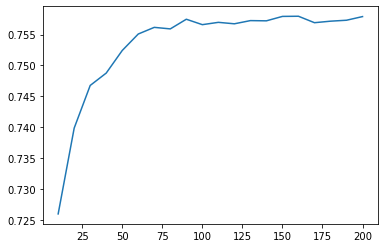

In [80]:
plt.plot(range(10,201,10), aucs)
plt.show()

In [81]:
all_aucs = {}

for depth in [5,10,20]:
    print(f'depth: {depth}')
    aucs = []
    
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, train_y)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(val_y, y_pred)
        print(f'{i}-->{auc}')
        aucs.append(auc)
        
    all_aucs[depth] = aucs
    print()

depth: 5
10-->0.7693563548211546
20-->0.7729475726371289
30-->0.7731289004247619
40-->0.7738281498469868
50-->0.7741051109257834
60-->0.7744211645970415
70-->0.7749346689895471
80-->0.7749867924461626
90-->0.7748907174307906
100-->0.7754625294188323
110-->0.7755528620194924
120-->0.7755124442544048
130-->0.7757774787795689
140-->0.7758044239562941
150-->0.7758103872331102
160-->0.7760319119237266
170-->0.7761425638379826
180-->0.7761502940116333
190-->0.7760040832985844
200-->0.7760959619339746

depth: 10
10-->0.7561061745976776
20-->0.7671183591182478
30-->0.7662236467337145
40-->0.7690345587351846
50-->0.7717507208939084
60-->0.7729831314359217
70-->0.7733638977037408
80-->0.7742647942271947
90-->0.7744560608095215
100-->0.7744997915061735
110-->0.7755687640910023
120-->0.7758267310288287
130-->0.7762843573089454
140-->0.7766010735665166
150-->0.7761014834865821
160-->0.7760104882996091
170-->0.7763466404223589
180-->0.7765913556339272
190-->0.7765639687329937
200-->0.776766278420535

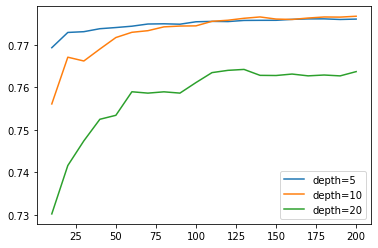

In [82]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()
plt.show()

In [83]:
all_aucs = {}

for m in [3,5,10]:
    print(f'min_samples_leaf: {m}')
    aucs = []
    
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=5, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, train_y)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(val_y, y_pred)
        print(f'{i}-->{auc}')
        aucs.append(auc)
        
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10-->0.7695752291665194
20-->0.7738252786396308
30-->0.7736759758571217
40-->0.7741190252383543
50-->0.7745391049607395
60-->0.7750278727975631
70-->0.7752463054187192
80-->0.7754265288958307
90-->0.7752387961071728
100-->0.7758927687980155
110-->0.7759300944936427
120-->0.7759254563894524
130-->0.7761847484999045
140-->0.77614499332113
150-->0.7761739262567937
160-->0.7763981012926617
170-->0.7762821486879025
180-->0.7763411188697513
190-->0.7761723802220636
200-->0.7762492402343613

min_samples_leaf: 5
10-->0.7694250429355931
20-->0.7737236820716513
30-->0.7737972291523842
40-->0.7743533599310203
50-->0.7742681071587593
60-->0.774689291191666
70-->0.7750890516004552
80-->0.7753379631920051
90-->0.7753609328508527
100-->0.775942683633588
110-->0.7759850891576142
120-->0.776065041239372
130-->0.776088231760324
140-->0.7761047964181466
150-->0.7761315207327674
160-->0.7763727021506669
170-->0.7762200864365932
180-->0.7762326755765383
190-->0.7760789555519433
200-->0.

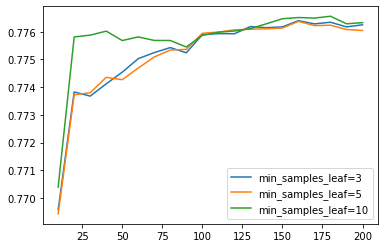

In [84]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10')
plt.legend()
plt.show()

In [85]:
rf = RandomForestClassifier(n_estimators=180, max_depth=5, min_samples_leaf=10, random_state=1)
rf.fit(X_train, train_y)
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.7765573428698644

#### Testing the final model

In [86]:
train_y = (train_full['defaulted']==1).values.reshape(-1,1)

In [87]:
del train_full['defaulted']

In [88]:
dict_train = train_full.fillna(0).to_dict(orient='records')
dict_test = test_X.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)

In [89]:
print(f'{len(X_train[0])}\n{len(X_test[0])}')

36
36


In [90]:
rf = RandomForestClassifier(n_estimators=180, max_depth=5, min_samples_leaf=10, random_state=1)
rf.fit(X_train, train_y)
y_pred = rf.predict_proba(X_test)[:,1]
roc_auc_score(test_y, y_pred)

0.7777075995772571